In [16]:
from typing import Callable

import numpy as np
import pandas as pd

from simulated_annealing.algorithm import simple_simulated_annealing
from simulated_annealing.cont_neighbors import gaussian_perturbation, uniform_perturbation
from simulated_annealing.experiment_utils import shape_progress, plot

REPS = 1
SEEDS = np.random.randint(200, size=REPS)

# Experiments

In [17]:
def f(x: np.ndarray) -> float:
    assert len(x) == 2
    x1, x2 = x
    return x1 ** 2 + x2 ** 2 + 25 * (np.sin(x1) ** 2 + np.sin(x2) ** 2)


sigma = 10 * 0.01


def gaussian_generator():
    def nbr(x: np.ndarray) -> np.ndarray:
        return gaussian_perturbation(x, sigma)

    return nbr


def uniform_generator():
    def nbr(x: np.ndarray) -> np.ndarray:
        return uniform_perturbation(x, sigma)

    return nbr


def experiment(nbr_generator: Callable[[], Callable[[np.ndarray], np.ndarray]],
               name: str,
               max_iters=2000,
               seeds=SEEDS,
               initial_temp=None) -> pd.DataFrame:
    results = []
    nbr = nbr_generator()

    for i in range(REPS):
        np.random.seed(seeds[i])
        s0 = np.random.uniform(-5, 5, size=2)
        results.append(
            simple_simulated_annealing(f, nbr, s0,
                                       initial_temperature=initial_temp,
                                       max_iterations=max_iters)
        )

    df = pd.concat([shape_progress(res) for res in results])
    df["Type"] = name
    return df

In [18]:
%%time
gaussian_df = experiment(gaussian_generator, "Gaussian")
uniform_df = experiment(uniform_generator, "Uniform")
full_df = pd.concat([gaussian_df, uniform_df])
full_df.to_csv("results/cont_sa.csv")

CPU times: user 46 ms, sys: 10.1 ms, total: 56 ms
Wall time: 45.1 ms


/home/nawat/.cache/pypoetry/virtualenvs/code-SenwC5NH-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.cache/pypoetry/virtualenvs/code-SenwC5NH-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nawat/.cache/pypoetry/virtualenvs/code-SenwC5NH-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nawat/.cache/pypoetry/virtualenvs/code-SenwC5NH-py3.10/lib/python3.10/site-

CPU times: user 24.2 s, sys: 153 ms, total: 24.4 s
Wall time: 24.2 s


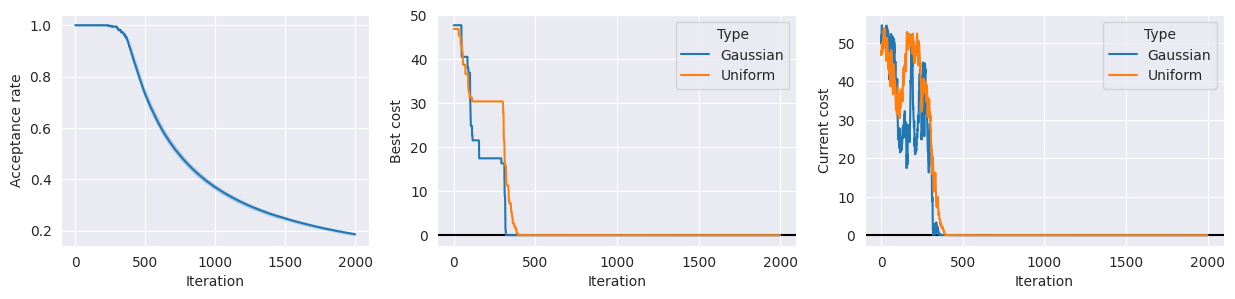

In [19]:
%%time
fig, _ = plot(full_df, 0)
fig.savefig("../images/cont_sa.png")